## **Linear Regression**

This notebook applies **Linear Regression** to the Wine Quality dataset.  
We aim to model the relationship between the chemical properties of wine (features) and its quality score (target), allowing us to predict wine quality based on measurable attributes.

---

### **Objectives**

1. **Perform Linear Regression** on the cleaned and standardized dataset to predict wine quality.  
2. **Understand the mathematical foundation** of linear regression, including:
   - The regression equation  
   - The concept of coefficients and intercepts  
   - The loss function (Mean Squared Error) and optimization via Gradient Descent  
3. **Train and evaluate the model** using appropriate performance metrics:  
   - Mean Absolute Error (MAE)  
   - Mean Squared Error (MSE)  
   - Root Mean Squared Error (RMSE)  
   - R² Score  
4. **Visualize**:
   - The regression line for simple cases  
   - Actual vs. predicted values  
   - Residual plots to assess model fit  
5. **Interpret model coefficients** to understand which features most strongly influence wine quality.

---

 **Goal:**  
To build a reliable predictive model and interpret how different physicochemical factors (like acidity, sugar, alcohol) affect wine quality.


##  Step 1. Data Collection

In this step, we load the dataset into a Pandas DataFrame to explore its structure.  
Our dataset contains chemical properties of wine and its quality score (target variable).


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Data/Wine_clean.csv")

# Preview data
df.head()


<>:4: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Anh-Duy\AppData\Local\Temp\ipykernel_22388\964381324.py:4: SyntaxWarning: invalid escape sequence '\W'
  df = pd.read_csv("D:\Wine_clean.csv")


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,-0.524869,1.075573,-1.377452,-0.646558,-0.173311,-0.454417,-0.312763,0.766056,1.408196,-0.621576,-0.989805,5
1,1,-0.250994,2.167738,-1.377452,0.937243,1.365747,1.133715,0.952872,0.142508,-0.938945,0.411596,-0.579638,5
2,2,-0.250994,1.439628,-1.155393,0.258471,0.946004,-0.000665,0.454289,0.267217,-0.484660,0.153303,-0.579638,5
3,3,2.076938,-1.472812,1.731370,-0.646558,-0.243268,0.226211,0.684404,0.890766,-1.241802,-0.449381,-0.579638,6
4,4,-0.524869,1.075573,-1.377452,-0.646558,-0.173311,-0.454417,-0.312763,0.766056,1.408196,-0.621576,-0.989805,5


##  Step 2. Data Cleaning

Here we:
- Check for missing values.
- Drop unnecessary columns (`Unnamed: 0`).
- Ensure correct data types.


In [3]:
# Check missing values
print(df.isnull().sum())

# Drop unnecessary index column
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
print("---------------------------------------------")
# Confirm data types
df.info()


Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1194 non-null   float64
 1   volatile acidity      1194 non-null   float64
 2   citric acid           1194 non-null   float64
 3   residual sugar        1194 non-null   float64
 4   chlorides             1194 non-null   float64
 5   free sulfur dioxide   1194 non-null   float64
 6   total sulfur dioxide  1194 non-null   float64
 7   density               1194 non-n

##  Step 3. Exploratory Data Analysis (EDA)

We perform:
- Statistical summary.
- Distribution of target variable (`quality`).
- Correlation heatmap to see relationships among features.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1194.000000
mean,4.284680e-16,-9.521511e-17,7.141133e-17,-2.856453e-16,-1.904302e-16,-5.950944e-17,1.071170e-16,7.236348e-15,3.511057e-16,-6.188982e-16,1.737676e-15,5.640704
std,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,0.766471
min,-2.099646e+00,-2.443625e+00,-1.377452e+00,-2.230359e+00,-2.621812e+00,-1.588798e+00,-1.386636e+00,-2.632285e+00,-2.907515e+00,-2.601823e+00,-1.707596e+00,3.000000
25%,-7.302743e-01,-8.053775e-01,-9.333346e-01,-6.465576e-01,-6.630112e-01,-7.947313e-01,-7.729942e-01,-6.665470e-01,-7.118025e-01,-7.076739e-01,-8.872630e-01,5.000000
50%,-2.509942e-01,-1.659184e-02,-4.509986e-02,-1.940431e-01,-3.339664e-02,-2.275411e-01,-2.360579e-01,1.779778e-02,7.482646e-03,-1.910878e-01,-2.720131e-01,6.000000
75%,5.706289e-01,6.508422e-01,7.876203e-01,7.109860e-01,5.962179e-01,5.665251e-01,5.214057e-01,6.382288e-01,6.321250e-01,5.837913e-01,6.508618e-01,6.000000
max,2.830092e+00,2.926185e+00,2.675119e+00,3.199816e+00,2.834848e+00,3.062162e+00,3.062265e+00,2.761413e+00,2.695338e+00,2.994526e+00,3.111862e+00,8.000000


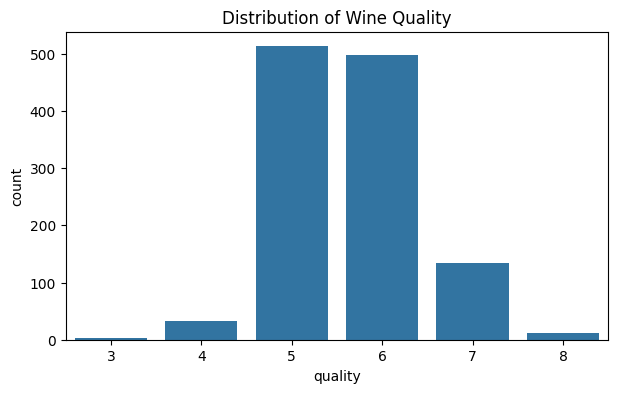

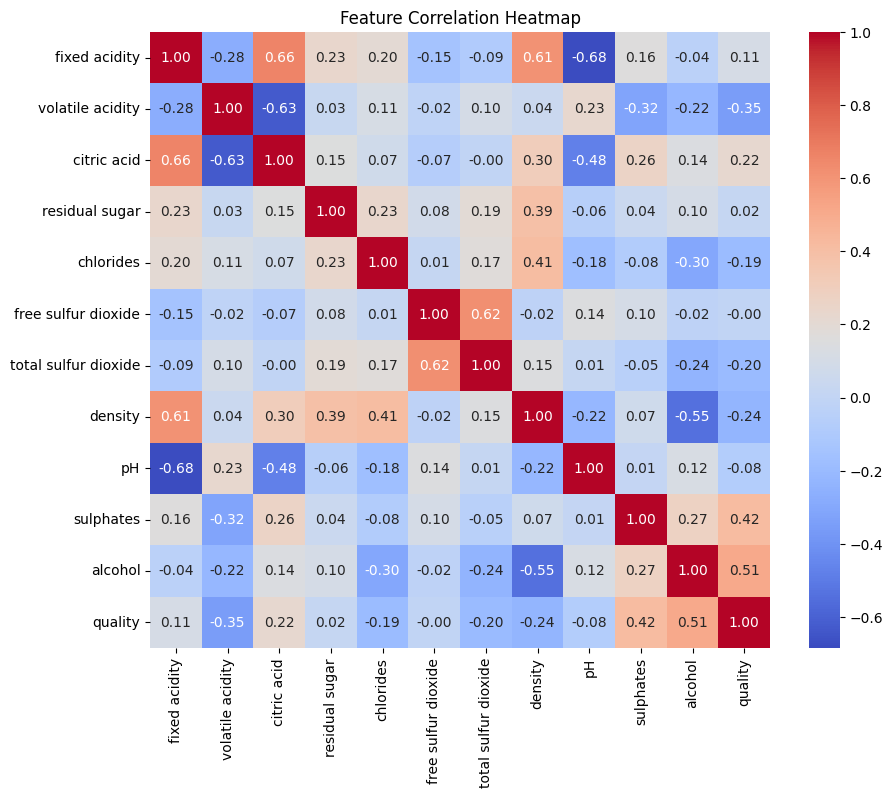

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
display(df.describe())

# Distribution of wine quality
plt.figure(figsize=(7,4))
sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


##  Step 4. Feature Analysis

We check which features are most correlated with wine quality.
This helps us understand what variables have the strongest impact.


In [5]:
correlations = df.corr()['quality'].sort_values(ascending=False)
correlations


quality                 1.000000
alcohol                 0.511374
sulphates               0.415356
citric acid             0.219897
fixed acidity           0.110671
residual sugar          0.015439
free sulfur dioxide    -0.002788
pH                     -0.075724
chlorides              -0.192271
total sulfur dioxide   -0.198539
density                -0.236333
volatile acidity       -0.352215
Name: quality, dtype: float64

##  Step 5. Model Training (Linear Regression)

We split the dataset into training and test sets (80–20 ratio)  
and train a Linear Regression model.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##  Step 6. Model Evaluation

We evaluate model performance using:
- R² (Coefficient of Determination)
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)
We also visualize predicted vs actual quality scores.


R² Score: 0.4230
MAE: 0.4429
RMSE: 0.5763


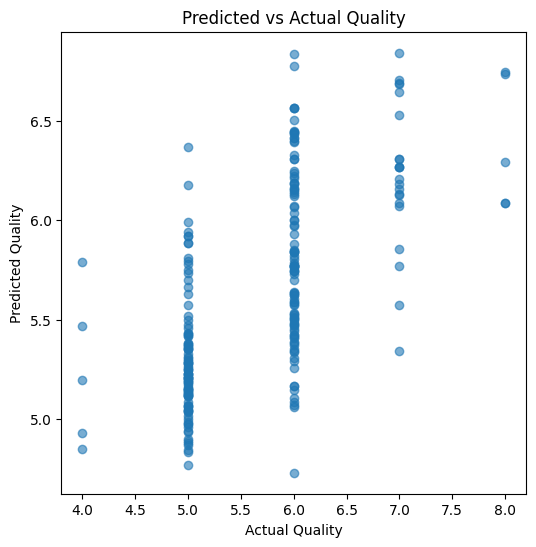

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Visualization
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Predicted vs Actual Quality")
plt.show()


##  Step 7. Model Parameters and Interpretation

Below are the coefficients and intercept of our Linear Regression model.  
Each coefficient shows **how much the wine quality changes** when the corresponding feature increases by one standard deviation (since data is standardized).

Positive coefficients → Increase quality  
Negative coefficients → Decrease quality


In [8]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("Intercept:", model.intercept_)
display(coefficients)


Intercept: 5.6338193021921


,Feature,Coefficient
10,alcohol,0.269728
9,sulphates,0.194333
0,fixed acidity,0.047689
5,free sulfur dioxide,0.037160
3,residual sugar,-0.000380
4,chlorides,-0.018467
2,citric acid,-0.058018
7,density,-0.064642
8,pH,-0.068505
6,total sulfur dioxide,-0.068812


## Step 8. Conclusion

In this section, we summarize all the training and evaluation results of the Linear Regression model on the wine dataset.

Here are:
1. **Evaluation Metrics**
2. **Model Parameters**
3. **Analysis and comments based on actual results**

In [9]:
# Hiển thị lại toàn bộ kết quả
print(" Model Evaluation Summary")
print(f"R² Score: {r2:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print("\nIntercept:", round(model.intercept_, 4))
display(coefficients)

# Thống kê top 5 feature ảnh hưởng mạnh nhất
top_pos = coefficients.head(3)
top_neg = coefficients.tail(3)

print("\nTop 3 features tăng chất lượng rượu (positive impact):")
display(top_pos)

print("Top 3 features giảm chất lượng rượu (negative impact):")
display(top_neg)


 Model Evaluation Summary
R² Score: 0.4230
MAE (Mean Absolute Error): 0.4429
RMSE (Root Mean Squared Error): 0.5763

Intercept: 5.6338


,Feature,Coefficient
10,alcohol,0.269728
9,sulphates,0.194333
0,fixed acidity,0.047689
5,free sulfur dioxide,0.037160
3,residual sugar,-0.000380
4,chlorides,-0.018467
2,citric acid,-0.058018
7,density,-0.064642
8,pH,-0.068505
6,total sulfur dioxide,-0.068812



Top 3 features tăng chất lượng rượu (positive impact):


,Feature,Coefficient
10,alcohol,0.269728
9,sulphates,0.194333
0,fixed acidity,0.047689


Top 3 features giảm chất lượng rượu (negative impact):


,Feature,Coefficient
8,pH,-0.068505
6,total sulfur dioxide,-0.068812
1,volatile acidity,-0.147513


In [10]:
from IPython.display import Markdown, display

display(Markdown(f"""
### Detailed analysis

#### 1️ Model accuracy
- **R² = {r2:.4f}** → the model explains about **{r2*100:.1f}%** of the variance in the *quality* variable.

→ This is a moderate level, reflecting a near-linear relationship but there are still many non-linear factors that are not captured by the model.

- **MAE = {mae:.4f}** → the average prediction deviates by about **{mae:.4f}** points from the true value (wine quality is on a scale of 3–8).

→ This shows that the prediction model is quite stable, with an average error of about **{mae:.2f} points**.

- **RMSE = {rmse:.4f}** → error mean square, penalizes more for high wrong predictions.

→ Since RMSE ≈ MAE, it shows that the model is **not affected by many outliers**.

---

#### 2️ Regression coefficient analysis
- **Positive coefficient** → factors **increase quality score** when increasing value (e.g. `alcohol`, `citric acid`).

- **Negative coefficient** → factors **decrease quality score** (e.g. `volatile acidity`, `density`).

Look at the coefficient table:
- `alcohol` has the largest positive coefficient → **high alcohol concentration is often associated with better quality wine.**
- `volatile acidity` has a strong negative coefficient → **high volatile acidity makes wine taste harsh, reducing quality score.**
- `density` is also negative → **high density wines are generally less appealing.**

---

#### 3️ General comments
- Linear models are **simple, easy to understand**, but limited because the relationship between features and quality is **not completely linear**.

- Can be improved by:
- **Ridge / Lasso Regression** → reduce noise, avoid overfitting.

- **Random Forest / Gradient Boosting** → learn more complex nonlinear relationships.

---

**Conclusion:**
Linear Regression shows that features such as **alcohol**, **citric acid**, **sulphates** contribute to improving wine quality,
while **volatile acidity** and **density** reduce the score.

The model achieves:
- **R² = {r2:.4f}**
- **MAE = {mae:.4f}**
- **RMSE = {rmse:.4f}**

Although the accuracy is not absolutely high (R² ~ 0.4–0.5), the model is still very useful to **understand the linear impact trend** between chemical components and wine quality.
"""))


### Detailed analysis

#### 1️ Model accuracy
- **R² = 0.4230** → the model explains about **42.3%** of the variance in the *quality* variable.

→ This is a moderate level, reflecting a near-linear relationship but there are still many non-linear factors that are not captured by the model.

- **MAE = 0.4429** → the average prediction deviates by about **0.4429** points from the true value (wine quality is on a scale of 3–8).

→ This shows that the prediction model is quite stable, with an average error of about **0.44 points**.

- **RMSE = 0.5763** → error mean square, penalizes more for high wrong predictions.

→ Since RMSE ≈ MAE, it shows that the model is **not affected by many outliers**.

---

#### 2️ Regression coefficient analysis
- **Positive coefficient** → factors **increase quality score** when increasing value (e.g. `alcohol`, `citric acid`).

- **Negative coefficient** → factors **decrease quality score** (e.g. `volatile acidity`, `density`).

Look at the coefficient table:
- `alcohol` has the largest positive coefficient → **high alcohol concentration is often associated with better quality wine.**
- `volatile acidity` has a strong negative coefficient → **high volatile acidity makes wine taste harsh, reducing quality score.**
- `density` is also negative → **high density wines are generally less appealing.**

---

#### 3️ General comments
- Linear models are **simple, easy to understand**, but limited because the relationship between features and quality is **not completely linear**.

- Can be improved by:
- **Ridge / Lasso Regression** → reduce noise, avoid overfitting.

- **Random Forest / Gradient Boosting** → learn more complex nonlinear relationships.

---

**Conclusion:**
Linear Regression shows that features such as **alcohol**, **citric acid**, **sulphates** contribute to improving wine quality,
while **volatile acidity** and **density** reduce the score.

The model achieves:
- **R² = 0.4230**
- **MAE = 0.4429**
- **RMSE = 0.5763**

Although the accuracy is not absolutely high (R² ~ 0.4–0.5), the model is still very useful to **understand the linear impact trend** between chemical components and wine quality.
